# Đồ án cuối kì
Họ tên: Nguyễn Thanh Mẫn

MSSV: 1712586

---

## Import

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Lấy dữ liệu

- Dữ liệu được sử dụng trong đồ án là thống kê về số lượng vụ tự sát trong các thành phố ở mỗi năm, được phân chia thành từng nhóm giới tính và độ tuổi khác nhau, kèm theo dân số của từng nhóm và một số thông tin về sự phát triển của thành phố đó trong năm. Nguồn của dữ liệu được lấy tại [đây](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv).

- License ở [đây](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets).

- Dữ liệu được thu thập từ 4 nguồn khác nhau:

    - [UNDP's Human development index (2018)](http://hdr.undp.org/en/indicators/137506)

    - [World Bank's World development indicators: GDP (current US$) by country: 1985 to 2016 (2018)](http://databank.worldbank.org/data/source/world-development-indicators#)

    - [Szamil's Suicide in the Twenty-First Century dataset (2017)](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

    - [World Health Organization's Suicide prevention](http://www.who.int/mental_health/suicide-prevention/en/)

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = df.shape
print("Dataset has {0} rows and {1} cols".format(num_rows, num_cols))

Dataset has 27820 rows and 12 cols


### Mỗi dòng và mỗi cột có ý nghĩa gì?

Mô tả về các cột của file "who_suicide_statistics.csv":
- **country**: thành phố của nước Ma-rốc.
- **year**: năm từ 1990 đến 2017.
- **sex**: giới tính, gồm nam (male) và nữ (female).
- **age**: nhóm tuổi.
- **suicides_no**: số lượng vụ tự sát.
- **population**: dân số thuộc nhóm tuổi và thành phố đó.
Mỗi dòng là số liệu thống kê các vụ tự sát trong mỗi thành phố, nhóm tuổi và năm.
- **suicides/100k pop**: tỉ lệ tự sát của nhóm tuổi đó trên 100 000 người.
- **country-year**: ghép giữa 2 cột **country** và **year** (cột này có vẻ không cần thiết nên sẽ lược bỏ trong bước tiền xử lý).
- **HDI for year**: chỉ số phát triển con người trong năm của thành phố đó ([Chỉ số phát triển con người là gì?](https://vi.wikipedia.org/wiki/Ch%E1%BB%89_s%E1%BB%91_ph%C3%A1t_tri%E1%BB%83n_con_ng%C6%B0%E1%BB%9Di)).
- **gdp_for_year**: chỉ số GDP trong năm của thành phố đó.
- **gdp_per_capita**: chỉ số GDP/ người.
- **generation**: thế hệ thuộc nhóm tuổi tương ứng (cột này có vẻ không cần thiết nên sẽ lược bỏ trong bước tiền xử lý).

Mỗi dòng là thống kê các vụ tự sát và thông tin về sự phát triển của mỗi nhóm tuổi sống trong một thành phố trong mỗi năm.

### Mỗi cột có dtype là gì?

In [4]:
col_dtypes = df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

## Tiền xử lý

### Bỏ cột country-year và cột generation

In [5]:
df.drop(columns=['country-year', 'generation'], inplace=True)

### Chỉnh lại tên của các cột cho hợp lý

In [6]:
df.rename(columns={
    df.columns[2]: 'gender',
    df.columns[4]: 'nsuicides',
    df.columns[6]: 'crudeRate',
    df.columns[7]: 'HDIyear',
    df.columns[8]: 'GDPyear',
    df.columns[9]: 'GDPcap'
},
          inplace=True)

### Bỏ hậu tố ' years' trong các phần tử của cột "age"

In [7]:
df.age = df.age.str.replace(' years', '')

### Sửa các phần tử "5-14" trong cột "age" thành "05-14" để dễ sort

In [8]:
df.loc[df.age == '5-14', 'age'] = '05-14'

### Chỉnh dtype của cột "GDPyear" thành dạng numeric

Cột "GDPyear" đang có dtype là object, để chuyển thành dạng numeric trước tiên ta cần loại bỏ các dấu phẩy của tất cả các hàng trong cột

In [9]:
df.GDPyear = df.GDPyear.str.replace(',', '')

Sau khi bỏ hết dấu phẩy, dùng `pd.to_numeric` để chuyển dtype thành dạng numeric

In [10]:
df.GDPyear = pd.to_numeric(df.GDPyear)

## Quay lại bước khám phá dữ liệu

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     27820 non-null  object 
 1   year        27820 non-null  int64  
 2   gender      27820 non-null  object 
 3   age         27820 non-null  object 
 4   nsuicides   27820 non-null  int64  
 5   population  27820 non-null  int64  
 6   crudeRate   27820 non-null  float64
 7   HDIyear     8364 non-null   float64
 8   GDPyear     27820 non-null  int64  
 9   GDPcap      27820 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 2.1+ MB


### Các cột dạng numeric có miền giá trị như thế nào?

Hiện đang có $6$ cột có dạng numeric. Miền giá trị của từng cột sẽ được lưu vào dataframe `col_ranges_df` có $2$ dòng là "min", "max" và $7$ cột là  "nsuicides", "population", "crudeRate", "HDIyear", "GDPyear", "GDPcap".

In [12]:
numeric_cols = [
    "nsuicides", "population", "crudeRate", "HDIyear", "GDPyear", "GDPcap"
]
col_ranges_df = pd.DataFrame()
col_ranges_df['min'] = df[numeric_cols].min()
col_ranges_df['max'] = df[numeric_cols].max()
col_ranges_df = col_ranges_df.T.astype(df[numeric_cols].dtypes.to_dict())
col_ranges_df

,nsuicides,population,crudeRate,HDIyear,GDPyear,GDPcap
min,0,278,0.00,0.483,46919625,251
max,22338,43805214,224.97,0.944,18120714000000,126352


### Các cột dạng categorical có các giá trị nào? 

Các cột dạng categorical: "year", "country", "gender", "age", "generation". Các giá trị của cột sẽ được lưu vào dataframe `cat_col_ranges_df` có $2$ dòng là "NumUniqueVals", "SomeFirstVals và $4$ cột "year", "country", "gender", "age".

In [13]:
cat_cols = ["year", "country", "gender", "age"]
cat_col_ranges_df = pd.DataFrame(columns=cat_cols)
cat_col_ranges_df.loc["NumUniqueVals"] = [
    df[col].nunique() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df.loc["SomeFirstVals"] = [
    np.sort(df[col].unique())[:3].tolist() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df

,year,country,gender,age
NumUniqueVals,32,101,2,6
SomeFirstVals,"[1985, 1986, 1987]","[Albania, Antigua and Barbuda, Argentina]","[female, male]","[05-14, 15-24, 25-34]"


### Mỗi cột có bao nhiêu phần trăm giá trị thiếu?

In [14]:
col_num_nans = np.round(df.isnull().mean() * 100, 1)
col_num_nans

country        0.0
year           0.0
gender         0.0
age            0.0
nsuicides      0.0
population     0.0
crudeRate      0.0
HDIyear       69.9
GDPyear        0.0
GDPcap         0.0
dtype: float64

Cột "HDIyear" bị thiếu khá nhiều (số giá trị thiếu lên tới gần $70\%$) nên ta sẽ bỏ cột này

In [15]:
df.drop(columns='HDIyear', inplace=True)

---

## Đưa ra các câu hỏi cần trả lời

### <span class="burk">Câu hỏi 1</span> ***Trong mỗi năm, thành phố nào có tỉ lệ tự sát cao nhất, thành phố nào có tỉ lệ tự sát thấp nhất?***

#### Tính crudeRateGeneral

Để tính tỉ lệ tự sát cho toàn dân số thuộc tất cả các nhóm tuổi của mỗi thành phố trong một năm, ta dùng `df.groupby` theo `country` và `year` rồi tính tổng số ca tự sát chia cho tổng số dân rồi nhân cho $100000$.

In [16]:
gb_df = df.groupby(['country', 'year'])
crudeRateGeneral = (gb_df.nsuicides.sum() /
                    (gb_df.population.sum() / 100000)).unstack()

#### Trả lời câu hỏi:

Câu trả lời được biểu diễn bằng dataframe `extreme_countries` có 2 cột là "Country with highest rate", "Country with lowest rate" và các dòng là năm. Mỗi giá trị được đi kèm với tỉ lệ tự sát của thành phố đó trong năm.

In [17]:
# Lấy ra các thuộc tính 'idxmax', 'max', 'idxmin', 'min'
extreme_countries = crudeRateGeneral.agg(['idxmax', 'max', 'idxmin', 'min']).T
# Làm tròn số cho mỗi cột bằng hàm apply
extreme_countries['min'] = extreme_countries['min'].apply(
    lambda x: round(x, 1))
extreme_countries['max'] = extreme_countries['max'].apply(
    lambda x: round(x, 1))
# Chỉnh dtype của hai cột số thành str
extreme_countries = extreme_countries.astype({"max": str, "min": str})
# Concat cột 'idmax' và 'max', cột 'idxmin' và 'min'
extreme_countries['idxmax'] = extreme_countries[
    'idxmax'] + ' (' + extreme_countries['max'] + ')'
extreme_countries['idxmin'] = extreme_countries[
    'idxmin'] + ' (' + extreme_countries['min'] + ')'
# Sau khi đã concat, bỏ cột 'min' và 'max'
extreme_countries.drop(columns=['min', 'max'], inplace=True)
# Chỉnh tên cột cho hợp lý
extreme_countries.columns = [
    'Country with highest rate', 'Country with lowest rate'
]
extreme_countries

,Country with highest rate,Country with lowest rate
1985,Sri Lanka (40.9),Antigua and Barbuda (0.0)
1986,Sri Lanka (37.9),Antigua and Barbuda (0.0)
1987,Finland (29.5),Antigua and Barbuda (0.0)
1988,Finland (30.3),Antigua and Barbuda (0.0)
1989,Finland (30.4),Antigua and Barbuda (0.0)
1990,Finland (32.3),Saint Kitts and Nevis (0.0)
1991,Hungary (40.9),Antigua and Barbuda (0.0)
1992,Hungary (41.0),Antigua and Barbuda (0.0)
1993,Russian Federation (40.6),Belize (0.6)
1994,Russian Federation (44.4),Antigua and Barbuda (0.0)


#### Kết luận

Đáng chú ý là tỉ lệ tự sát đáng báo động của [Lithuania](https://en.wikipedia.org/wiki/Suicide_in_Lithuania), khi mà nước này là nước có tỉ lệ [cao nhất](https://theculturetrip.com/europe/lithuania/articles/this-country-has-among-the-highest-suicide-rates-in-the-world/) kéo dài từ năm 1995 đến 2016.

### <span class="burk">Câu hỏi 2</span> ***Qua thời gian, tìm ra 3 thành phố với tỉ lệ tự sát có xu hướng tăng lên mạnh nhất và 3 thành phố với tỉ lệ tự sát có xu hướng giảm xuống mạnh nhất (chỉ xét trong những thành phố có ít nhất 50% dữ liệu hợp lệ)***

Ở câu hỏi này, dĩ nhiên ta không thể vẽ biểu đồ cho tất cả $101$ thành phố được. Vì thế ta sẽ dùng mô hình hồi quy tuyến tính đơn giản "$y = ax+b$"  ($y$ là `crudeRateGeneral` còn $x$ là `year`) để đo độ tăng (giảm) của tỉ lệ tự sát qua các năm. Nếu $a$ càng dương thì tỉ lệ tăng càng lớn, nếu $a$ càng âm thì tỉ lệ giảm càng lớn.

Vì ta chỉ xét những thành phố có ít nhất $50\%$ dữ liệu hợp lệ, ta chỉ giữ những dòng nào có ít nhất $16$ dữ liệu hợp lệ.

In [18]:
crudeRateGeneral.dropna(thresh=16, inplace=True)

#### Tính $a$ (mức tăng hay giảm tỉ lệ tự sát mỗi thành phố)

In [19]:
a = []
for i in range(crudeRateGeneral.shape[0]):
    # Lọc dòng thứ i (bỏ cột nào có giá trị NaN) rồi lưu vào Y
    Y = crudeRateGeneral.iloc[[i]].dropna(axis=1)
    # Lấy tên cột của Y lưu vào X
    X = np.array(Y.columns)
    # Chuyển vị Y rồi thêm cột 1 vào sau
    Y = np.array(Y).T
    Y = np.hstack((Y, np.ones(Y.shape)))
    # Chuyển X thành ma trận 2 chiều
    X = X.reshape((Y.shape[0], 1))
    # Tìm ra đường hồi quy rồi lấy ra 'a'
    a.append((LinearRegression().fit(X, Y).coef_)[0, 0])
a = np.array(a)

#### Lưu kết quả vào Series `result` rồi sort

In [20]:
result = pd.Series(data=a, index=crudeRateGeneral.index)
result.sort_values(inplace=True)

#### Vẽ biểu đồ

Text(0.5, 0, 'Average suicide crude rate increased or decreased after each year')

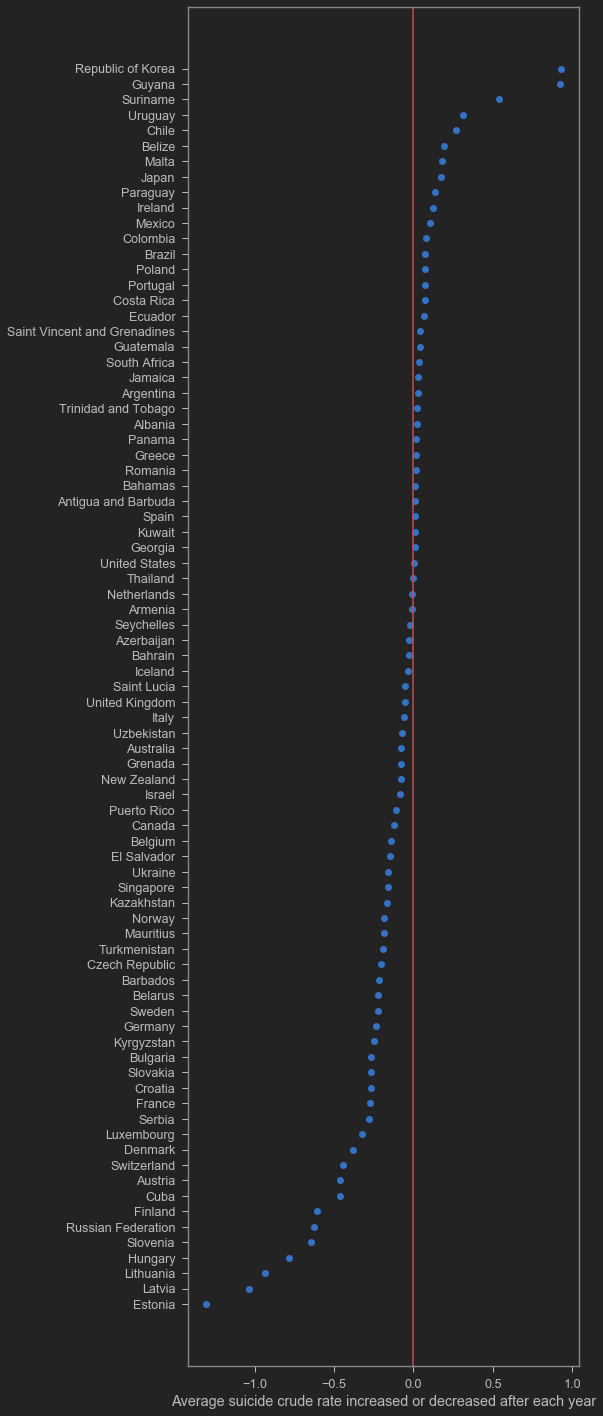

In [21]:
plt.figure(figsize=[7, 25])
plt.plot(result.values, result.index, 'o')
plt.axvline(x=0, c='r')
plt.xlabel("Average suicide crude rate increased or decreased after each year")

#### Từ biểu đồ, ta có thể đưa ra câu trả lời cho câu hỏi

- Top 3 thành phố / quốc gia với tỉ lệ tự sát có xu hướng tăng mạnh nhất: Hàn Quốc, Guyana và Suriname.
- Top 3 thành phố / quốc gia với tỉ lệ tự sát có xu hướng giảm mạnh nhất: Estonia, Latvia, Lithuania.

Một điểm thú vị là Lithuania dù là nước có tỉ lệ tự sát cao nhất kéo dài từ năm 1995 đến 2016, nhưng lại thuộc top 3 có tỉ lệ tự sát giảm mạnh nhất. Đây là một dấu hiệu đáng mừng cho đất nước này.

#### Trong số các thành phố có đủ dữ liệu, tỉ lệ thành phố có tỉ lệ tự sát có xu hướng tăng và giảm là bao nhiêu?

In [22]:
icr = np.round(np.mean(a > 0) * 100, 1)
dcr = np.round(np.mean(a < 0) * 100, 1)
print(
    "In valid countries: There are about {0}% with increasing crude rate and about {1}% with decreasing crude rate"
    .format(icr, dcr))

In valid countries: There are about 40.7% with increasing crude rate and about 59.3% with decreasing crude rate


Đây có vẻ là con số khả quan khi có nhiều thành phố giảm tỉ lệ tự sát hơn là tăng.

#### <span class="mark">Câu hỏi nhỏ</span>: Biến `year` và `GDPcap` (trên từng quốc gia có ít nhất $50\%$ dữ liệu hợp lệ) có quan hệ như thế nào?

Để trả lời câu hỏi này, ta cần tính mức độ tuyến tính (correlation coefficent) `r` của hai biến `year` và `GDPcap` trên từng thành phố. Nhưng trước hết ta cần trích ra `GDPcap` của mỗi thành phố cho từng năm và chỉ giữ những thành phố nào có ít nhất $50\%$ dữ liệu hợp lệ.

In [23]:
GDPcap = gb_df.GDPcap.unique().unstack().dropna(thresh=16)
GDPcap.sample(5)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Malta,[3639],[4544],[5517],[6295],[6539],[7780],[8313],[9040],[8022],[8775],...,[20333],[23007],[21695],[22132],[23984],[23074],[25191],[27634],[25750],NaN
Argentina,[3264],[4072],[4026],[4458],[2670],[4859],[6404],[7615],[7768],[8328],...,[7918],[9843],[8961],[11273],[13946],[14203],[14206],[13400],[14981],NaN
Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[17504],[19141],[15609],[15540],[18545],[18411],[20221],[21117],[18149],NaN
Slovenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[24964],[28599],[25872],[24689],[26377],[23820],[24697],[25569],[22036],NaN
United Kingdom,[9231],[11323],[13996],[17072],[17349],[20411],[21201],[21815],[19553],[20927],...,[53576],[50111],[41074],[41798],[44491],[44585],[45594],[49906],[47240],NaN


In [24]:
avg_r = 0
for i in range(GDPcap.shape[0]):
    # Trích dòng thứ i, loại bỏ NaN, chuyển list thành số rồi lưu vào X
    X = GDPcap.iloc[i].dropna().apply(lambda x: x[0])
    # Trích các index của X lưu vào Y
    Y = np.array(X.index)
    # Đưa X và y về đơn vị chuẩn
    X = np.array((X - X.mean()) / X.std())
    Y = (Y - Y.mean()) / Y.std()
    # Cập nhật giá trị correllation trung bình
    avg_r += np.mean(X * Y) / GDPcap.shape[0]
avg_r

0.8807841076160243

Con số này cho thấy nhìn chung thì biến `GDPcap` có mối quan hệ tuyến tính đồng biến *mạnh* với biến `year`, hay nói cách khác là GDP bình quân đầu người của các thành phố nhìn chung đều tăng theo thời gian.

#### Kết luận

Từ câu hỏi nhỏ trên ta có thể thấy chất lượng cuộc sống của người dân nhìn chung ngày càng được cải thiện. Tuy nhiên, tuỳ vào thành phố / quốc gia mà tỉ lệ tự sát tăng hay giảm. Có nghĩa là không phải lúc nào chất lượng cuộc sống tốt hơn đều khiến con người trở nên hạnh phúc hơn, hay nói đơn giản là: "Không phải lúc nào tiền cũng làm bạn hạnh phúc" :-)

### <span class="burk">Câu hỏi 3</span> ***Nhóm tuổi nào có số lượng vụ tự sát nhiều nhất, có tỉ lệ tự sát cao nhất?***

In [25]:
gb_age_df = df.groupby(['year', 'age'])

#### Tính tổng số vụ tự tử trên toàn cầu theo mỗi nhóm tuổi

In [26]:
nsuicidesAge = gb_age_df.nsuicides.sum().unstack()

#### Tính tỉ lệ tự tử trên toàn cầu theo mỗi nhóm tuổi

In [27]:
crudeRateAge = (gb_age_df.nsuicides.sum() /
                (gb_age_df.population.sum() / 100000)).unstack()

#### Biểu diễn hai biểu đồ bằng các subplot

Text(0.5, 0, 'Year')

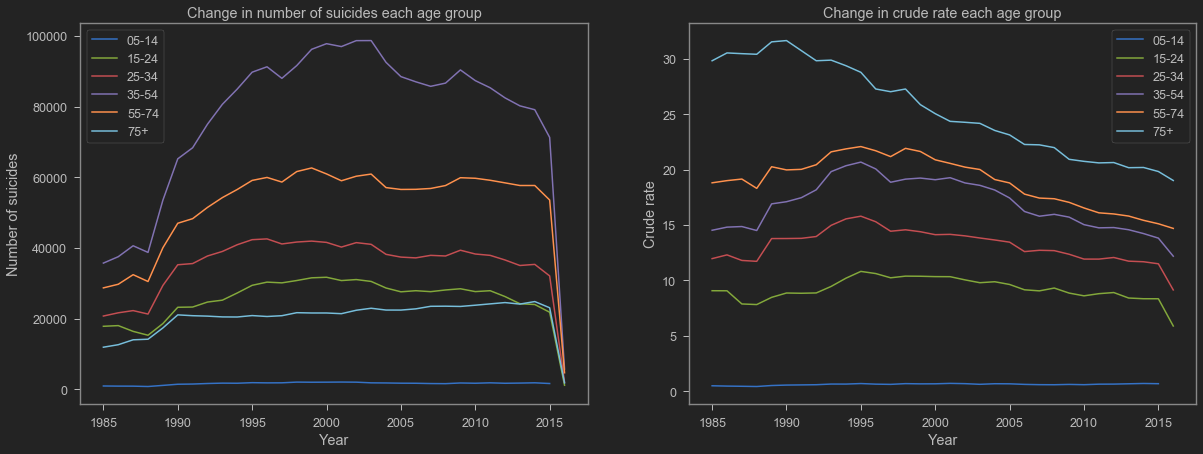

In [28]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
plt.plot(nsuicidesAge)
plt.legend(nsuicidesAge.columns)
plt.title("Change in number of suicides each age group")
plt.ylabel("Number of suicides")
plt.xlabel("Year")
plt.subplot(1, 2, 2)
plt.plot(crudeRateAge)
plt.legend(crudeRateAge.columns)
plt.title("Change in crude rate each age group")
plt.ylabel("Crude rate")
plt.xlabel("Year")

#### Trả lời cho câu hỏi

Ở đây có 2 nhóm tuổi đáng chú ý là nhóm "35-54" - Boomer và nhóm "75+" - Silent
- Nhóm Boomer có số ca tự tử cao nhất.
- Nhóm Silent có tỉ lệ tự tử cao nhất.

#### Kết luận

- Nếu có người chết vì tự tử thì khả năng cao người đó thuộc thế hệ Boomer.
- Người thuộc thế hệ Silent có nguy cơ tự tử cao.

### <span class="burk">Câu hỏi 4</span>***Trải qua các năm, tỉ lệ tự tử của nam và nữ thay đổi như thế nào?***

Để trả lời tổng quát cho câu hỏi này, ta lấy số ca tự tử của nam và của nữ, chia cho dân số nam và nữ trong từng năm.

In [29]:
gender_gb_df = df.groupby(['year', 'gender'])
gender_rate = (gender_gb_df.nsuicides.sum() / (gender_gb_df.population.sum() / 100000)).unstack()

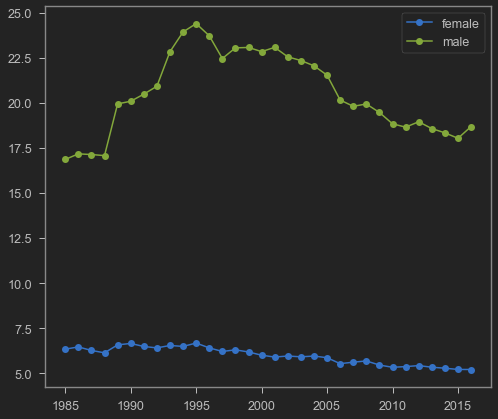

In [30]:
plt.plot(gender_rate, marker='o')
plt.legend(gender_rate.columns)

#### Trả lời cho câu hỏi

Từ biểu đồ ta có thể thấy, tỉ lệ tự tử của đàn ông luôn cao vượt trội hơn phụ nữ

#### Kết luận

Đàn ông có nguy cơ tự tử cao hơn phụ nữ

---

# Nhìn lại quá trình làm đồ án

### Khó khăn

- Gặp khó khăn để tìm ra biểu đồ hợp lí cho câu hỏi thứ 2
- Khi tìm ra được dạng biểu đồ hợp lí (stem plot) thì không biết tinh chỉnh sao cho hợp lí nên đành chọn scatter plot để biểu diễn (dù vẫn chưa hài lòng lắm)

$\Rightarrow$ Có lẽ em nên đăng kí môn "Trực quan hoá dữ liệu" vào kì sau :P

### Đã học được những gì?

- Nhuần nhuyễn hơn về cách sử dụng thư viện Numpy và Pandas
- Trong quá trình làm đồ án, em đã rút ra được nhiều fact hay. Thí dụ như:
    - Đàn ông có tỉ lệ tự tử cao hơn phụ nữ, trong khi phụ nữ thì có ý định tự tử thường xuyên hơn đàn ông: Điều này chứng tỏ rằng đàn ông ít bị trầm cảm, áp lực hơn phụ nữ. Nhưng cũng chính vì xã hội luôn bắt đàn ông phải mạnh mẽ và không thừa nhận mình đang phải vật lộn như thế nào nên dễ bị tuyệt vọng, dẫn đến khi có ý định tự tử, đàn ông thường dứt khoát hơn phụ nữ. Có vẻ như cánh mày râu cũng cần được quan tâm, chăm sóc về mặt tinh thần không kém gì phụ nữ.
    - Tiền không (phải lúc nào cũng) mang đến hạnh phúc: Người ta thường nói câu này, nhưng không có ai thực sự chứng minh được. Nhưng bây giờ nhờ sức mạnh của thống kê suy diễn, em càng thấy câu nói này càng hợp tình hợp lý :D

### Nếu có thêm thời gian sẽ làm gì?

Tìm ra cách để biểu diễn biểu đồ stem plot cho câu hỏi 2 một cách hợp lý

# Tài liệu tham khảo

[Hey you!! Suicide is not a solution](https://www.kaggle.com/snanilim/hey-you-suicide-is-not-a-solution)

[Suicides over different perspectives](https://www.kaggle.com/papeloto/suicides-over-different-perspectives)